FIRST EXPLORATION OF FASTF1

In [1]:
#Imports
import fastf1
import pandas as pd
import matplotlib.pyplot as plt

#Settings
fastf1.Cache.enable_cache('cache')
pd.set_option('display.max_columns', None) 

print("Setup Complete")


Setup Complete


In [2]:
#load data
session = fastf1.get_session(2025, 'Monaco', 'R')
session.load()

#Getting data
laps = session.laps
results = session.results
drivers = session.drivers
schedule = fastf1.get_event_schedule(2025)

print(results[['DriverNumber', 'Abbreviation', 'TeamName','ClassifiedPosition', 'GridPosition']])
print(schedule[['EventDate', 'EventName', 'Location']])

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '16', '81', '1', '44', '6', '31', '30', '23', '55', '63', '87', '43', '5', '18', '27', '22', '12', '14', '10']


   DriverNumber Abbreviation         TeamName ClassifiedPosition  GridPosition
4             4          NOR          McLaren                  1           1.0
16           16          LEC          Ferrari                  2           2.0
81           81          PIA          McLaren                  3           3.0
1             1          VER  Red Bull Racing                  4           4.0
44           44          HAM          Ferrari                  5           7.0
6             6          HAD     Racing Bulls                  6           5.0
31           31          OCO     Haas F1 Team                  7           8.0
30           30          LAW     Racing Bulls                  8           9.0
23           23          ALB         Williams                  9          10.0
55           55          SAI         Williams                 10          11.0
63           63          RUS         Mercedes                 11          14.0
87           87          BEA     Haas F1 Team       

In [3]:
#filtering data
drivers_laps = laps.pick_drivers('NOR')
fastest_lap = laps.pick_fastest()
qualy_laps = laps.pick_quicklaps()

print(drivers_laps[['Driver', 'LapTime']].head(10))
print(fastest_lap)


    Driver                LapTime
734    NOR 0 days 00:01:23.340000
735    NOR 0 days 00:01:44.634000
736    NOR 0 days 00:01:49.015000
737    NOR 0 days 00:01:41.564000
738    NOR 0 days 00:01:18.050000
739    NOR 0 days 00:01:19.172000
740    NOR 0 days 00:01:18.470000
741    NOR 0 days 00:01:17.626000
742    NOR 0 days 00:01:22.148000
743    NOR 0 days 00:01:20.385000
Time                      0 days 02:36:42.913000
Driver                                       NOR
DriverNumber                                   4
LapTime                   0 days 00:01:13.221000
LapNumber                                   78.0
Stint                                        3.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:19.145000
Sector2Time               0 days 00:00:34.697000
Sector3Time               0 days 00:00:19.379000
Sector1SessionTime        0 days 02:35:48.884000
Sector2SessionTime        0 days 02:36

In [4]:
#calculations/filtering
print(laps.info())
avg_times = laps.groupby('Team')['LapTime'].mean()
print(avg_times.sort_values())

<class 'fastf1.core.Laps'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                1425 non-null   timedelta64[ns]
 1   Driver              1425 non-null   object         
 2   DriverNumber        1425 non-null   object         
 3   LapTime             1423 non-null   timedelta64[ns]
 4   LapNumber           1425 non-null   float64        
 5   Stint               1425 non-null   float64        
 6   PitOutTime          40 non-null     timedelta64[ns]
 7   PitInTime           41 non-null     timedelta64[ns]
 8   Sector1Time         1404 non-null   timedelta64[ns]
 9   Sector2Time         1424 non-null   timedelta64[ns]
 10  Sector3Time         1423 non-null   timedelta64[ns]
 11  Sector1SessionTime  1402 non-null   timedelta64[ns]
 12  Sector2SessionTime  1424 non-null   timedelta64[ns]
 13  Sector3SessionTime  1423 non-null   timedelt

req            INFO 	Using cached data for driver_info


Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'LapTimeDelta'],
      dtype='object')
   Driver                LapTime           LapTimeDelta
0     NOR 0 days 00:01:13.221000        0 days 00:00:00
1     RUS 0 days 00:01:13.405000 0 days 00:00:00.184000
2     ANT 0 days 00:01:13.518000 0 days 00:00:00.297000
3     PIA 0 days 00:01:13.745000 0 days 00:00:00.524000
4     SAI 0 days 00:01:13.988000 0 days 00:00:00.767000
5     LEC 0 days 00:01:14.055000 0 days 00:00:00.834000
6     HAM 0 days 00:01:14.090000 0 days 00:00:00.869000
7     VER 0 days 00:01:14.230000

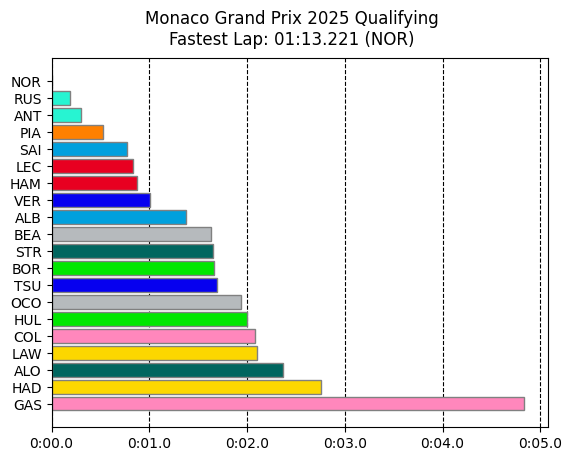

In [5]:
from fastf1.core import Laps
import fastf1.plotting
from timple.timedelta import strftimedelta

#plotting
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None)
drivers = pd.unique(session.laps['Driver'])

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_drivers(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)

fastest_laps = Laps(list_fastest_laps) \
    .sort_values(by='LapTime') \
    .reset_index(drop=True)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

print(fastest_laps.columns)
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.get_team_color(lap['Team'], session=session)
    team_colors.append(color)

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

SECOND EXPLORATION OF FASTF1

In [6]:
races_to_test = ['Bahrain', 'Australia', 'Canada']

for race in races_to_test:
    try:
        print(f"\n{'='*50}")
        print(f"Loading {race}")

        session = fastf1.get_session(2025 , race , 'R')
        session.load()

        print(f"{race}: {len(session.laps)} laps,  {len(session.drivers)} drivers ")

    except Exception as e:
        print(f"Error loading {race}: {e}")

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info



Loading Bahrain


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '16', '44', '1', '10', '31', '22', '87', '12', '23', '6', '7', '14', '30', '18', '5', '55', '27']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Bahrain: 1128 laps,  20 drivers 

Loading Australia


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '87'
core        WARNING 	Fixed incorrect tyre stint information for driver '30'
core        WARNING 	Fixed incorrect tyre stint information for driver '5'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 4 completed the race distance 00:00.022000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '63', '12', '2

Australia: 927 laps,  20 drivers 

Loading Canada


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '12', '81', '16', '44', '14', '27', '31', '55', '87', '22', '43', '5', '10', '6', '18', '4', '30', '23']


Canada: 1349 laps,  20 drivers 


In [7]:
# Database Planning

"""
DATABASE SCHEMA NOTES:

Based on exploration

RACES table:
- year (from session.event.year)
- race_name (from session.event.EventName)
- event_date (from session.event.EventDate)
- location (from session.event.Location)
- country (from session.event.Country)

DRIVERS table:
- driver_code (from 'Driver' column - e.g., 'VER')
- driver_number (from 'DriverNumber')
- abbreviation (from results 'Abbreviation')

LAPS table (from session.laps):
- race_id (foreign key)
- driver_id (foreign key)
- lap_number (from 'LapNumber')
- lap_time_seconds (from 'LapTime' converted)
- compound (from 'Compound')
- tyre_life (from 'TyreLife')
- stint (from 'Stint')
- team (from 'Team')
- is_personal_best (from 'IsPersonalBest')

RACE_RESULTS table (from session.results):
- race_id (foreign key)
- driver_id (foreign key)
- position (from 'ClassifiedPosition')
- grid_position (from 'GridPosition')
- points (from 'Points')
- status (from 'Status')
"""

# Verify these columns exist
print("Checking if planned columns exist...")
print("\nEvent columns I need: " )
needeed_event_cols = ['EventName', 'EventDate', 'Location', 'Country']

for field in needeed_event_cols:
    exists = field in session.event.keys()
    print(f" {field}: {'~' if exists else 'missing'}")

print("\nLaps columns I need:")
needed_lap_cols = ['Driver', 'LapNumber', 'LapTime', 'Compound', 'TyreLife', 'Stint', 'Team', 'IsPersonalBest']
for col in needed_lap_cols:
    exists = col in laps.columns
    print(f"  {col}: {'✓' if exists else '✗ MISSING'}")

print("\nResults columns I need:")
needed_result_cols = ['DriverNumber', 'Abbreviation', 'ClassifiedPosition', 'GridPosition', 'Points', 'Status']
for col in needed_result_cols:
    exists = col in results.columns
    print(f"  {col}: {'✓' if exists else '✗ MISSING'}")

Checking if planned columns exist...

Event columns I need: 
 EventName: ~
 EventDate: ~
 Location: ~
 Country: ~

Laps columns I need:
  Driver: ✓
  LapNumber: ✓
  LapTime: ✓
  Compound: ✓
  TyreLife: ✓
  Stint: ✓
  Team: ✓
  IsPersonalBest: ✓

Results columns I need:
  DriverNumber: ✓
  Abbreviation: ✓
  ClassifiedPosition: ✓
  GridPosition: ✓
  Points: ✓
  Status: ✓


In [8]:
#data type exploration
print("LapTime type:", laps['LapTime'].dtype )
print("Sample Time", laps['LapTime'].iloc[0])

laps['lapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
print("Converted Time", laps['lapTimeSeconds'].iloc[0])

print("\nNull values in key columns:")
print(laps[['LapTime', 'Compound', 'TyreLife']].isnull().sum())

# See what happens with missing lap times
print("\nRows with missing lap times:")
print(laps[laps['LapTime'].isnull()][['Driver', 'LapNumber', 'TrackStatus']].head())


LapTime type: timedelta64[ns]
Sample Time 0 days 00:01:27.020000
Converted Time 87.02

Null values in key columns:
LapTime     2
Compound    0
TyreLife    0
dtype: int64

Rows with missing lap times:
    Driver  LapNumber TrackStatus
85     GAS        8.0          12
197    ALO       37.0           1


In [9]:
# Find pit laps
pit_laps = laps[laps['PitInTime'].notna()]
print(f"Laps with PitOutTime: {laps['PitOutTime'].notna().sum()}")
print(f"Total pit stops: {len(pit_laps)}")


print("\nPit stop data sample:")
print(pit_laps[['Driver', 'LapNumber', 'Compound', 'TyreLife', 'PitInTime', 'PitOutTime']].head())

# Calculate pit stop duration
pit_laps_copy = pit_laps.copy()
pit_laps_copy['PitDuration'] = (pit_laps_copy['PitOutTime'] - pit_laps_copy['PitInTime']).dt.total_seconds()
print("\nAverage pit stop duration by team:")
print(pit_laps_copy.groupby('Team')['PitDuration'].mean().sort_values())


Laps with PitOutTime: 40
Total pit stops: 41

Pit stop data sample:
    Driver  LapNumber Compound  TyreLife              PitInTime PitOutTime
27     VER       28.0     HARD      28.0 0 days 01:33:29.565000        NaT
76     VER       77.0   MEDIUM      49.0 0 days 02:35:22.869000        NaT
78     GAS        1.0   MEDIUM       7.0 0 days 00:57:37.624000        NaT
85     GAS        8.0   MEDIUM       7.0 0 days 01:08:39.977000        NaT
154    ANT       69.0     HARD      69.0 0 days 02:28:35.673000        NaT

Average pit stop duration by team:
Team
Alpine            NaN
Aston Martin      NaN
Ferrari           NaN
Haas F1 Team      NaN
Kick Sauber       NaN
McLaren           NaN
Mercedes          NaN
Racing Bulls      NaN
Red Bull Racing   NaN
Williams          NaN
Name: PitDuration, dtype: float64


In [10]:
sqlite3 -header -column data/database.db "SELECT * FROM races WHERE year=2025 LIMIT 50;"
sqlite3 -header -column data/database.db "SELECT * FROM drivers LIMIT 50;"
sqlite3 -header -column data/database.db "SELECT * FROM results LIMIT 50;"
sqlite3 -header -column data/database.db "SELECT * FROM laps LIMIT 50;"

SyntaxError: invalid syntax (1857932019.py, line 1)

In [ ]:
import sqlite3

# Connect to database (from notebook directory, go up one level)
conn = sqlite3.connect('../data/database.db')
cursor = conn.cursor()

print("Before cleanup:")
cursor.execute("SELECT COUNT(*) FROM races WHERE year=2020")
print(f"Total 2023 races: {cursor.fetchone()[0]}")

# Find duplicates: races with matching dates but different names
cursor.execute("""
    SELECT event_date, COUNT(*), GROUP_CONCAT(race_name, ' | ')
    FROM races 
    WHERE year=2020
    GROUP BY event_date
    HAVING COUNT(*) > 1
""")
duplicates = cursor.fetchall()
print(f"\nDuplicate dates: {len(duplicates)}")
for date, count, names in duplicates:
    print(f"  {date}: {names}")

# Delete races that DON'T contain "Grand Prix" (keep the full names)
print("\nDeleting short-name races and testing events...")
cursor.execute("""
    DELETE FROM races 
    WHERE year=2020
    AND (
        race_name NOT LIKE '%Grand Prix%'
        OR race_name LIKE '%Testing%'
        OR race_name LIKE '%Test%'
    )
""")
deleted = cursor.rowcount
print(f"Deleted {deleted} rows")

# Clean up orphaned results and laps (if any)
cursor.execute("""
    DELETE FROM results 
    WHERE race_id NOT IN (SELECT id FROM races)
""")
orphaned_results = cursor.rowcount

cursor.execute("""
    DELETE FROM laps 
    WHERE race_id NOT IN (SELECT id FROM races)
""")
orphaned_laps = cursor.rowcount

print(f"Cleaned {orphaned_results} orphaned results, {orphaned_laps} orphaned laps")

conn.commit()

print("\nAfter cleanup:")
cursor.execute("SELECT COUNT(*) FROM races WHERE year=2020")
print(f"Total 2023 races: {cursor.fetchone()[0]}")

cursor.execute("SELECT id, race_name, event_date, location FROM races WHERE year=2020 ORDER BY event_date")
races = cursor.fetchall()
print("\nRemaining races:")
for race_id, name, date, location in races:
    print(f"  {race_id:3d} | {name:35s} | {date} | {location}")

conn.close()
print("\n Cleanup complete!")

add the races type to the laps (Qualifying, Race , free practice)